# Adjacency matrices 
A quick way to look at:
- the average adjacency matrix of our lamina circuits 
- the variance of each type of synaptic connection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression

from vis.hex_lattice import hexplot
from vis.fig_tools import linear_cmap, subtype_cm

In [2]:
tp = '210615'
cx = pd.read_pickle(f'~/Data/{tp}_lamina/{tp}_cxdf.pickle')
subtypes = np.unique([*cx["pre_type"], *cx["post_type"]])

adj_mn = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type')
display(adj_mn.round(decimals=1))
adj_var = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.var)
display((adj_var).round(decimals=1))
adj_sd = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.std)
display(adj_sd.round(decimals=1))

# post_sd_sum = (adj_var**0.5).sum(axis=0)
# display(post_sd_sum)

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.1,0.5,0.7,0.1,0.1,0.0,0.1,0.0,0.1,0.5,0.4,0.1
LMC_2,21.9,5.1,13.0,13.8,0.2,0.1,1.6,0.1,2.0,4.2,2.6,4.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.5,1.3,3.1,0.3,0.1,0.3,0.1,0.3,0.0,0.3,0.1,0.4
R1R4,35.9,43.0,19.2,4.3,1.1,0.2,5.5,1.0,0.2,2.6,0.3,12.8
R2R5,35.2,53.4,37.3,13.3,0.8,0.6,2.8,0.3,1.0,12.6,1.1,33.4
R3R6,33.3,41.4,20.4,4.7,1.7,0.8,4.5,0.3,0.1,2.6,0.2,11.2
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.2,1.0,1.2,0.2,0.1,0.0,0.1,0.0,0.1,1.0,1.0,0.1
LMC_2,23.6,20.3,46.1,88.1,0.6,0.1,4.8,0.2,5.2,14.3,4.0,17.5
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,14.5,2.2,11.3,0.6,0.1,0.5,0.2,0.5,0.0,0.3,0.1,1.0
R1R4,86.6,70.1,56.7,16.3,2.7,0.4,5.3,2.1,0.3,5.0,0.3,50.1
R2R5,40.9,98.4,63.8,93.3,2.4,0.8,4.5,0.2,2.5,28.6,2.8,104.7
R3R6,77.7,55.3,58.7,16.6,3.2,1.0,4.8,0.7,0.2,4.5,0.3,52.2
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.4,1.0,1.1,0.4,0.3,0.0,0.4,0.0,0.4,1.0,1.0,0.4
LMC_2,4.9,4.5,6.8,9.4,0.8,0.3,2.2,0.4,2.3,3.8,2.0,4.2
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.2,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.8,1.5,3.4,0.8,0.4,0.7,0.4,0.7,0.0,0.6,0.3,1.0
R1R4,9.3,8.4,7.5,4.0,1.6,0.6,2.3,1.5,0.5,2.2,0.5,7.1
R2R5,6.4,9.9,8.0,9.7,1.5,0.9,2.1,0.5,1.6,5.3,1.7,10.2
R3R6,8.8,7.4,7.7,4.1,1.8,1.0,2.2,0.8,0.4,2.1,0.5,7.2
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
ctype_order = ['R1R4', 'R2R5', 'R3R6', 'R7', 'R8', 'R7p', 'LMC_1', 'LMC_2', 'LMC_3', 'LMC_4', 'LMC_N', 'centri']
ordered_mn = adj_mn.reindex(ctype_order).reindex(ctype_order, axis=1)
ordered_sd = adj_sd.reindex(ctype_order).reindex(ctype_order, axis=1)

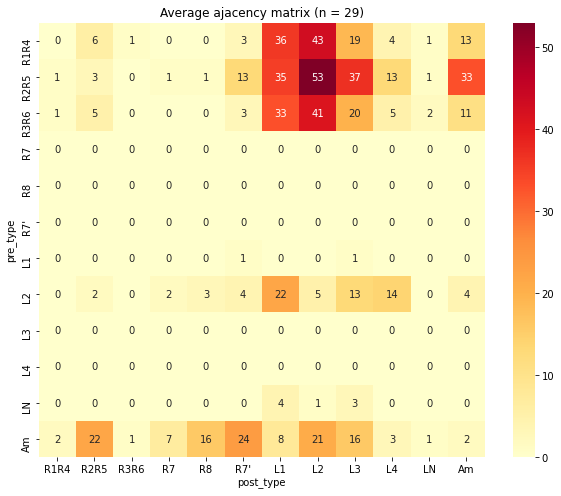

In [4]:
fig, ax = plt.subplots(1, figsize=(10, 8))

labels = ['R1R4', 'R2R5', 'R3R6', 'R7', 'R8', "R7'", 'L1', 'L2', 'L3', 'L4', 'LN', 'Am']

sns.heatmap(ordered_mn.round(), annot=True, ax=ax,cmap='YlOrRd', xticklabels=labels, yticklabels=labels)
ax.set_title('Average ajacency matrix (n = 29)')
fig.savefig("/mnt/home/nchua/Dropbox/200615_mean-adj-order.pdf")

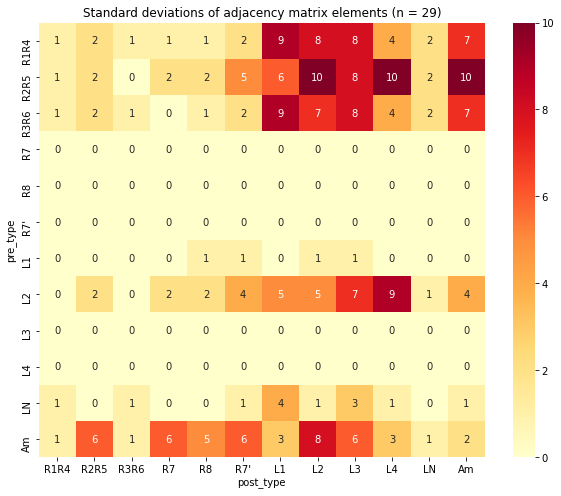

In [5]:
fig, ax = plt.subplots(1, figsize=(10, 8))

sns.heatmap(ordered_sd.round(), annot=True, ax=ax,cmap='YlOrRd', xticklabels=labels, yticklabels=labels)
ax.set_title('Standard deviations of adjacency matrix elements (n = 29)')
fig.savefig("/mnt/home/nchua/Dropbox/200615_sd-adj-order.pdf")

In [6]:
# Individial ommatidia
ommatidia = np.unique(cx['om']).astype(str)
display(ommatidia)
adj_mats = dict.fromkeys(ommatidia)
adj_err = dict.fromkeys(ommatidia)
post_sd = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.var)
for o in ommatidia:
    adj_mats[o] = pd.pivot_table(cx.loc[cx['om'] == o], values='n_connect', index='pre_type', columns='post_type')
    adj_err[o] = adj_mats[o] - adj_mn.round(decimals=0)
    
    display(f"Ommatidium {o}")
    display(adj_mats[o])
#     display("~~Error relative to SD~~")
#     display((adj_err[o]/adj_sd).round(decimals=2))

    display(f"~"*80)

array(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'B0', 'B1', 'B2', 'B3', 'B4',
       'B5', 'B6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'E4', 'E5', 'E6', 'E7'], dtype='<U2')

'Ommatidium A0'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,20.0,0.0,3.0,18.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,6.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
R1R4,38.0,36.0,24.0,7.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,15.0
R2R5,38.0,48.0,39.0,22.0,1.0,1.0,8.0,1.0,0.0,5.0,3.0,37.0
R3R6,46.0,31.0,22.0,12.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,11.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium A1'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,33.0,12.0,12.0,33.0,0.0,1.0,6.0,0.0,1.0,10.0,4.0,1.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,4.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
R1R4,42.0,57.0,22.0,7.0,1.0,0.0,4.0,0.0,0.0,4.0,0.0,9.0
R2R5,39.0,60.0,32.0,27.0,1.0,0.0,3.0,1.0,0.0,18.0,2.0,30.0
R3R6,40.0,43.0,18.0,9.0,0.0,0.0,4.0,0.0,0.0,7.0,0.0,3.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium A2'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,18.0,5.0,13.0,21.0,0.0,0.0,4.0,0.0,0.0,10.0,4.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
R1R4,31.0,42.0,12.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
R2R5,27.0,53.0,35.0,15.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,11.0
R3R6,30.0,47.0,15.0,3.0,0.0,2.0,3.0,0.0,0.0,6.0,2.0,0.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium A3'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,24.0,4.0,16.0,17.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,7.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,4.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,33.0,44.0,17.0,8.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,28.0
R2R5,40.0,74.0,36.0,21.0,0.0,1.0,1.0,0.0,0.0,16.0,2.0,52.0
R3R6,38.0,48.0,22.0,3.0,2.0,0.0,5.0,0.0,2.0,5.0,2.0,26.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium A4'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,26.0,1.0,17.0,25.0,4.0,0.0,0.0,0.0,2.0,6.0,1.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
R1R4,36.0,44.0,15.0,6.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,10.0
R2R5,35.0,55.0,46.0,18.0,4.0,0.0,2.0,0.0,2.0,11.0,0.0,27.0
R3R6,33.0,34.0,24.0,7.0,5.0,0.0,6.0,0.0,0.0,2.0,0.0,3.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium A5'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,20.0,5.0,5.0,16.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,8.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,35.0,38.0,11.0,4.0,1.0,0.0,9.0,1.0,0.0,0.0,0.0,16.0
R2R5,39.0,59.0,23.0,26.0,5.0,1.0,2.0,0.0,6.0,9.0,0.0,44.0
R3R6,27.0,31.0,11.0,2.0,6.0,1.0,10.0,0.0,0.0,2.0,0.0,11.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B0'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,24.0,3.0,4.0,0.0,0.0,0.0,6.0,0.0,3.0,18.0,7.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,66.0,36.0,16.0,0.0,1.0,3.0,7.0,0.0,0.0,2.0,0.0,1.0
R2R5,34.0,58.0,34.0,0.0,2.0,3.0,5.0,0.0,0.0,26.0,1.0,17.0
R3R6,56.0,53.0,24.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,1.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B1'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,18.0,1.0,5.0,9.0,0.0,0.0,2.0,0.0,1.0,6.0,4.0,18.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,2.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
R1R4,40.0,31.0,32.0,15.0,2.0,0.0,7.0,2.0,0.0,1.0,1.0,29.0
R2R5,40.0,35.0,33.0,5.0,0.0,2.0,5.0,0.0,0.0,25.0,7.0,52.0
R3R6,29.0,29.0,32.0,17.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,24.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B2'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
LMC_2,25.0,0.0,9.0,17.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,1.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,16.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
R1R4,32.0,37.0,17.0,1.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0,17.0
R2R5,30.0,56.0,31.0,23.0,0.0,0.0,4.0,0.0,0.0,14.0,0.0,33.0
R3R6,29.0,43.0,24.0,6.0,1.0,2.0,2.0,0.0,0.0,4.0,0.0,14.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B3'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
LMC_2,21.0,4.0,17.0,23.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
R1R4,30.0,50.0,9.0,9.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,4.0
R2R5,31.0,47.0,42.0,21.0,5.0,0.0,3.0,0.0,0.0,21.0,0.0,15.0
R3R6,31.0,37.0,17.0,5.0,4.0,0.0,6.0,0.0,0.0,1.0,0.0,2.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B4'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,30.0,8.0,23.0,16.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,5.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
R1R4,20.0,41.0,17.0,6.0,1.0,1.0,5.0,0.0,0.0,4.0,0.0,8.0
R2R5,34.0,61.0,58.0,25.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,30.0
R3R6,27.0,40.0,15.0,9.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,7.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B5'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,27.0,6.0,11.0,24.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,10.0,3.0,9.0,3.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,5.0
R1R4,41.0,36.0,12.0,10.0,6.0,0.0,7.0,1.0,0.0,0.0,0.0,15.0
R2R5,31.0,56.0,41.0,28.0,0.0,0.0,1.0,0.0,2.0,8.0,1.0,37.0
R3R6,33.0,36.0,8.0,6.0,3.0,1.0,7.0,0.0,0.0,1.0,0.0,15.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B6'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,21.0,0.0,10.0,17.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,5.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
R1R4,28.0,41.0,14.0,6.0,3.0,0.0,8.0,1.0,0.0,1.0,1.0,12.0
R2R5,34.0,51.0,29.0,14.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,29.0
R3R6,25.0,35.0,11.0,4.0,1.0,0.0,7.0,0.0,0.0,1.0,0.0,17.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C1'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,17.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,45.0,50.0,39.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,1.0,12.0
R2R5,30.0,42.0,25.0,0.0,0.0,2.0,5.0,1.0,0.0,17.0,4.0,31.0
R3R6,41.0,38.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C2'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,14.0,8.0,14.0,7.0,1.0,0.0,0.0,0.0,1.0,5.0,5.0,7.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,5.0,4.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
R1R4,47.0,61.0,39.0,1.0,0.0,0.0,4.0,3.0,0.0,6.0,1.0,24.0
R2R5,23.0,60.0,31.0,8.0,0.0,0.0,3.0,1.0,0.0,15.0,3.0,48.0
R3R6,35.0,41.0,36.0,5.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,11.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C3'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
LMC_2,22.0,7.0,13.0,18.0,0.0,0.0,2.0,0.0,1.0,7.0,3.0,1.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,40.0,61.0,15.0,2.0,2.0,0.0,5.0,0.0,0.0,3.0,0.0,4.0
R2R5,35.0,56.0,43.0,20.0,0.0,0.0,6.0,0.0,0.0,14.0,0.0,26.0
R3R6,40.0,62.0,22.0,8.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,5.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C4'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
LMC_2,21.0,1.0,16.0,17.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,12.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
R1R4,37.0,51.0,24.0,7.0,0.0,0.0,9.0,0.0,0.0,3.0,0.0,14.0
R2R5,38.0,59.0,44.0,24.0,0.0,0.0,2.0,0.0,0.0,10.0,0.0,41.0
R3R6,29.0,45.0,29.0,4.0,1.0,0.0,4.0,0.0,1.0,6.0,1.0,7.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C5'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,17.0,13.0,17.0,15.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,8.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
R1R4,27.0,32.0,16.0,3.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,10.0
R2R5,23.0,63.0,34.0,14.0,0.0,0.0,0.0,0.0,2.0,13.0,0.0,31.0
R3R6,18.0,32.0,16.0,2.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,9.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C6'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,20.0,1.0,12.0,17.0,0.0,0.0,3.0,1.0,6.0,2.0,5.0,4.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
R1R4,41.0,38.0,15.0,0.0,2.0,1.0,8.0,1.0,0.0,0.0,0.0,15.0
R2R5,37.0,59.0,35.0,10.0,0.0,0.0,6.0,0.0,5.0,13.0,0.0,29.0
R3R6,42.0,36.0,11.0,4.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,15.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D2'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,24.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,5.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,33.0,38.0,22.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,17.0
R2R5,44.0,22.0,44.0,0.0,0.0,1.0,5.0,1.0,0.0,16.0,0.0,48.0
R3R6,34.0,38.0,29.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,28.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D3'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0,1.0
LMC_2,19.0,3.0,9.0,18.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,46.0,51.0,22.0,3.0,0.0,0.0,9.0,3.0,0.0,2.0,0.0,2.0
R2R5,49.0,59.0,40.0,18.0,0.0,0.0,3.0,0.0,0.0,11.0,3.0,22.0
R3R6,44.0,43.0,25.0,5.0,1.0,3.0,5.0,0.0,0.0,4.0,0.0,8.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D4'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0
LMC_2,23.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,6.0,3.0,5.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0
R1R4,49.0,54.0,19.0,11.0,3.0,0.0,4.0,0.0,0.0,9.0,1.0,14.0
R2R5,48.0,42.0,42.0,16.0,0.0,1.0,0.0,0.0,0.0,12.0,1.0,39.0
R3R6,52.0,41.0,14.0,8.0,4.0,0.0,2.0,0.0,0.0,4.0,0.0,18.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D5'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0
LMC_2,18.0,1.0,16.0,28.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,7.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,25.0,41.0,26.0,8.0,0.0,1.0,9.0,2.0,2.0,3.0,0.0,11.0
R2R5,33.0,57.0,47.0,6.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,26.0
R3R6,30.0,44.0,30.0,8.0,3.0,2.0,2.0,1.0,0.0,2.0,0.0,11.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D6'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,19.0,2.0,11.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,31.0,44.0,12.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,17.0
R2R5,41.0,45.0,35.0,11.0,1.0,0.0,2.0,0.0,2.0,9.0,0.0,33.0
R3R6,24.0,48.0,15.0,6.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,18.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D7'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,23.0,6.0,11.0,17.0,0.0,0.0,3.0,0.0,8.0,3.0,6.0,4.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,34.0,45.0,12.0,4.0,6.0,0.0,6.0,5.0,0.0,0.0,0.0,14.0
R2R5,40.0,64.0,26.0,15.0,0.0,0.0,4.0,1.0,2.0,5.0,0.0,37.0
R3R6,29.0,50.0,17.0,3.0,1.0,2.0,3.0,0.0,0.0,3.0,0.0,17.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium E4'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
LMC_2,32.0,6.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
R1R4,31.0,37.0,24.0,0.0,1.0,0.0,2.0,2.0,0.0,3.0,2.0,20.0
R2R5,33.0,47.0,38.0,0.0,3.0,3.0,1.0,1.0,0.0,16.0,3.0,36.0
R3R6,28.0,38.0,16.0,0.0,0.0,3.0,6.0,4.0,0.0,0.0,0.0,11.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium E5'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
LMC_2,18.0,8.0,30.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,2.0,14.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
R1R4,26.0,43.0,20.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,11.0
R2R5,32.0,51.0,53.0,0.0,2.0,0.0,1.0,0.0,0.0,6.0,0.0,40.0
R3R6,27.0,49.0,23.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,4.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium E6'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,28.0,4.0,23.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,5.0,3.0,5.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0
R1R4,32.0,38.0,17.0,0.0,1.0,0.0,7.0,0.0,1.0,4.0,0.0,9.0
R2R5,26.0,58.0,32.0,0.0,0.0,0.0,2.0,0.0,2.0,11.0,0.0,28.0
R3R6,23.0,48.0,14.0,0.0,1.0,1.0,6.0,0.0,0.0,6.0,0.0,9.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium E7'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,14.0,8.0,11.0,0.0,0.0,1.0,3.0,2.0,3.0,0.0,2.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
R1R4,24.0,30.0,18.0,0.0,2.0,0.0,8.0,5.0,0.0,2.0,0.0,13.0
R2R5,36.0,53.0,35.0,0.0,0.0,0.0,3.0,1.0,3.0,7.0,0.0,39.0
R3R6,27.0,41.0,16.0,0.0,4.0,0.0,7.0,2.0,0.0,1.0,0.0,12.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'